In [4]:
import zipfile
import io
import requests

# data handling
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# feature selection
from sklearn.feature_selection import mutual_info_classif

# classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [5]:
# URL of the zip file on GitHub
file_url = "https://github.com/albertegi/Cancer-Classification/blob/main/cancer_gene_expression.zip?raw=true"

# Step 1: Download the zip file
response = requests.get(file_url)
response.raise_for_status()  # Ensure the download was successful

# Step 2: Open the zip file in memory
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # List files in the zip
    print(z.namelist())
    #extract and read it the csv file directly
    with z.open('cancer_gene_expression.csv') as f:
        dataframe = pd.read_csv(f)

# Now `dataframe` should contain the data from the CSV file
print(dataframe.head())

['cancer_gene_expression.csv']
   gene_1  gene_2  gene_3    gene_4  gene_5  gene_6  gene_7  gene_8    gene_9  \
0     0.0     0.0     0.0  2.088413     0.0     0.0     0.0     0.0  0.550605   
1     0.0     0.0     0.0  3.205955     0.0     0.0     0.0     0.0  0.425244   
2     0.0     0.0     0.0  4.746646     0.0     0.0     0.0     0.0  2.639417   
3     0.0     0.0     0.0  1.173191     0.0     0.0     0.0     0.0  1.527371   
4     0.0     0.0     0.0  1.366532     0.0     0.0     0.0     0.0  0.000000   

    gene_10  ...  gene_7992  gene_7993  gene_7994  gene_7995  gene_7996  \
0  2.815760  ...  11.558803   8.881802   6.014840   6.643534  11.740624   
1  2.354396  ...  11.062829   9.032864   5.054193   6.432320  12.104985   
2  1.657091  ...  12.497640   7.198160   0.943434   7.371690  11.202356   
3  2.732899  ...  11.261713   8.725676   6.300418   6.036451  11.732303   
4  3.388355  ...  12.241965   7.685204   5.142948   6.355788  11.493950   

   gene_7997  gene_7998  gene_7

# Data Exploration & Cleaning

In [6]:
# Check the number of features and samples in the dataset
# The last column contains the target variable
print(dataframe.shape)

(801, 8001)


In [7]:
# Check the first five columns in the dataset
print(dataframe.columns[0:5])

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5'], dtype='object')


In [8]:
# Check the name of the last column
dataframe.columns[-1]

'Cancer_Type'

In [9]:
#Check for missing values

data_null_values = dataframe.isnull().sum()
null_values = [data_null_value for data_null_value in data_null_values if data_null_value > 0]
print('Colums with missing values:%d'%len(null_values))




Colums with missing values:0


<Axes: ylabel='count'>

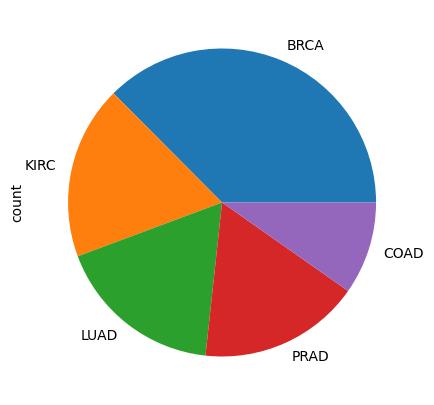

In [10]:
# plot a pie chat chat to display the class distribution

dataframe['Cancer_Type'].value_counts().plot(kind='pie', figsize=(10, 5))

In [11]:
# plot a bar chat chat to display the class distribution

dataframe['Cancer_Type'].value_counts().plot.bar

<bound method PlotAccessor.bar of <pandas.plotting._core.PlotAccessor object at 0x10fac1100>>

## Cancer Types
### BRCA - Breast Cancer
### KIRC - Kidney
### LUAD - Lung Cancer
### PRAD - Prostrate Cancer
### COAD - Colon Cancer

# Data preprocessing
### This is to process the data in a suitable format before modelling 

In [12]:
# separate the features from the target variable.

X = dataframe.iloc[:, 0:-1]
y = dataframe.iloc[:,-1]

In [13]:
X.shape

(801, 8000)

In [14]:
y.shape

(801,)

# Encode Labels

### The target variable is categorical, and therefore need to be converted to numberic form.

In [16]:
# Encode the target variables (y) with values between 0 and n_classes-1.
# Use the LabelEncoder class

label_encoder = LabelEncoder()
label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
labels = label_encoder.classes_
classes = np.unique(y_encoded)

In [19]:
y_encoded

array([2, 2, 0, 2, 1, 3, 2, 3, 0, 1, 4, 0, 4, 4, 2, 4, 2, 3, 3, 4, 0, 1,
       0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 2, 4, 0, 0, 0, 4, 0, 0, 1, 0,
       3, 2, 1, 1, 2, 0, 4, 1, 0, 3, 3, 0, 3, 0, 0, 4, 3, 4, 0, 4, 3, 0,
       1, 2, 2, 0, 1, 1, 0, 4, 2, 0, 4, 3, 1, 2, 2, 3, 2, 0, 0, 0, 4, 3,
       0, 3, 4, 2, 0, 0, 0, 2, 4, 2, 0, 4, 3, 3, 2, 0, 0, 4, 0, 0, 0, 0,
       0, 2, 3, 2, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 3, 0, 0, 2, 0, 3, 0, 1, 4, 1, 3, 1, 3, 0, 1, 0, 0, 0,
       2, 1, 1, 3, 3, 4, 3, 0, 3, 2, 0, 2, 0, 3, 0, 3, 2, 2, 3, 0, 0, 0,
       3, 2, 1, 3, 0, 0, 3, 0, 4, 4, 3, 1, 0, 0, 0, 4, 1, 0, 4, 0, 4, 1,
       0, 4, 2, 4, 4, 0, 3, 0, 3, 0, 0, 2, 2, 3, 2, 3, 4, 0, 2, 3, 3, 1,
       3, 0, 4, 3, 0, 1, 3, 2, 4, 0, 0, 4, 3, 2, 4, 0, 4, 2, 0, 2, 3, 0,
       3, 0, 2, 4, 0, 2, 4, 0, 0, 4, 3, 3, 0, 3, 0, 2, 0, 0, 0, 0, 4, 2,
       2, 4, 0, 3, 0, 0, 0, 4, 3, 0, 0, 2, 3, 2, 3, 4, 3, 1, 0, 0, 3, 2,
       0, 1, 0, 4, 3, 1, 3, 1, 2, 3, 2, 1, 0, 0, 3,

In [17]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [18]:
classes

array([0, 1, 2, 3, 4])

## Data Splitting

### Split the dataset into training and test set. the training set is initially passed to the machine learning
### model. this is to enable the model to identify discriminatory patterns which can be used to make future
### predictions. The test data is used to evaluate the model after the training phase.


In [22]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.2, random_state=42)

## Data Normalization
### Data normalization is done so that the values are in the same range. This will improve model 
### performance and avoid bias


In [23]:
# Scale data between 0 and 1

min_max_scaler = MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
X_test_norm = min_max_scaler.fit_transform(X_test)

## Feature Selection using Mutual Information
### The purpose of feature selection is to select relevant features for classification. feauture selection is usually used as preprocessing step before the actual learning.
### Mutual information algorithm is used to compute the relevance of each feature. the top n (eg.300)
## are selected for the machine learning analysis.

In [24]:
MI = mutual_info_classif(X_train_norm, y_train)

In [27]:
# Select top n features. lets say 300
# you can modify the value and see how the performance of the model changes.

n_features = 300
selected_scores_indices = np.argsort(MI)[::-1][0:n_features]

In [28]:
X_train_selected = X_train_norm[:,selected_scores_indices]
X_test_selected = X_test_norm[:,selected_scores_indices]

In [30]:
X_train_selected.shape

(640, 300)

In [31]:
X_test_selected.shape

(161, 300)